<a href="https://colab.research.google.com/github/DryBoss/plant-disease-model/blob/main/plant_disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from skimage import io, color, segmentation
import matplotlib.pyplot as plt
import numpy as np

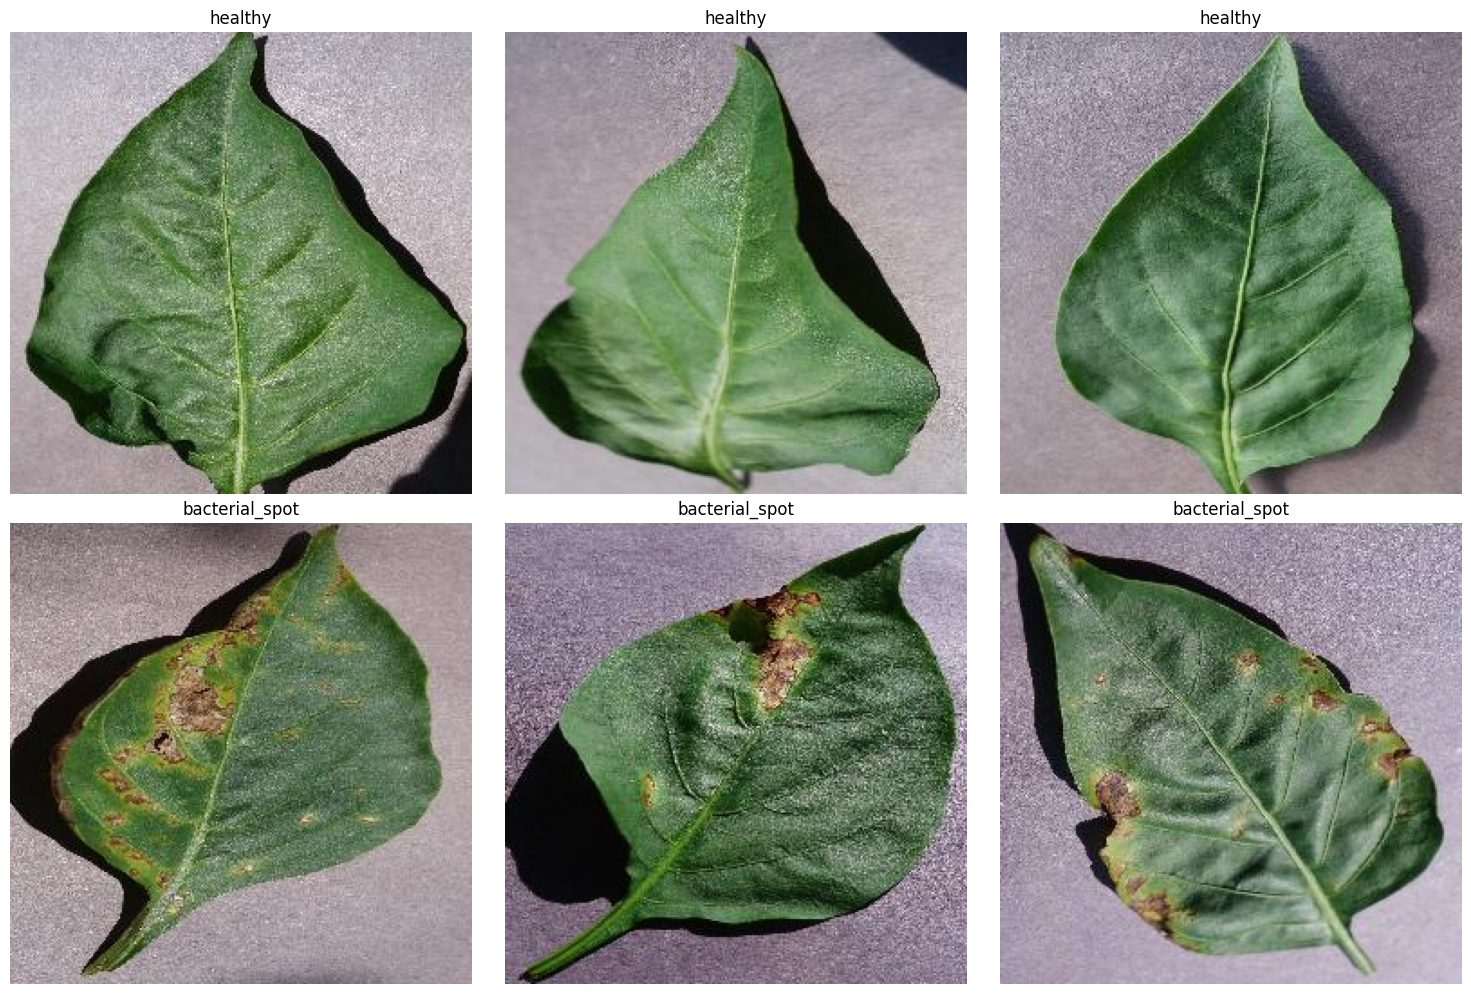

In [39]:
# Image categories and URLs
images_pepper_bell = {
    "healthy": [
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL%207886.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL%207955.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL%208068.JPG"
    ],
    "bacterial_spot": [
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot%208964.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot%203395.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot%203132.JPG"
    ]
}

# Flatten images and titles
all_images = [(io.imread(url), label) for label, urls in images_pepper_bell.items() for url in urls]

# Plot images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for ax, (img, title) in zip(axes.flat, all_images):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

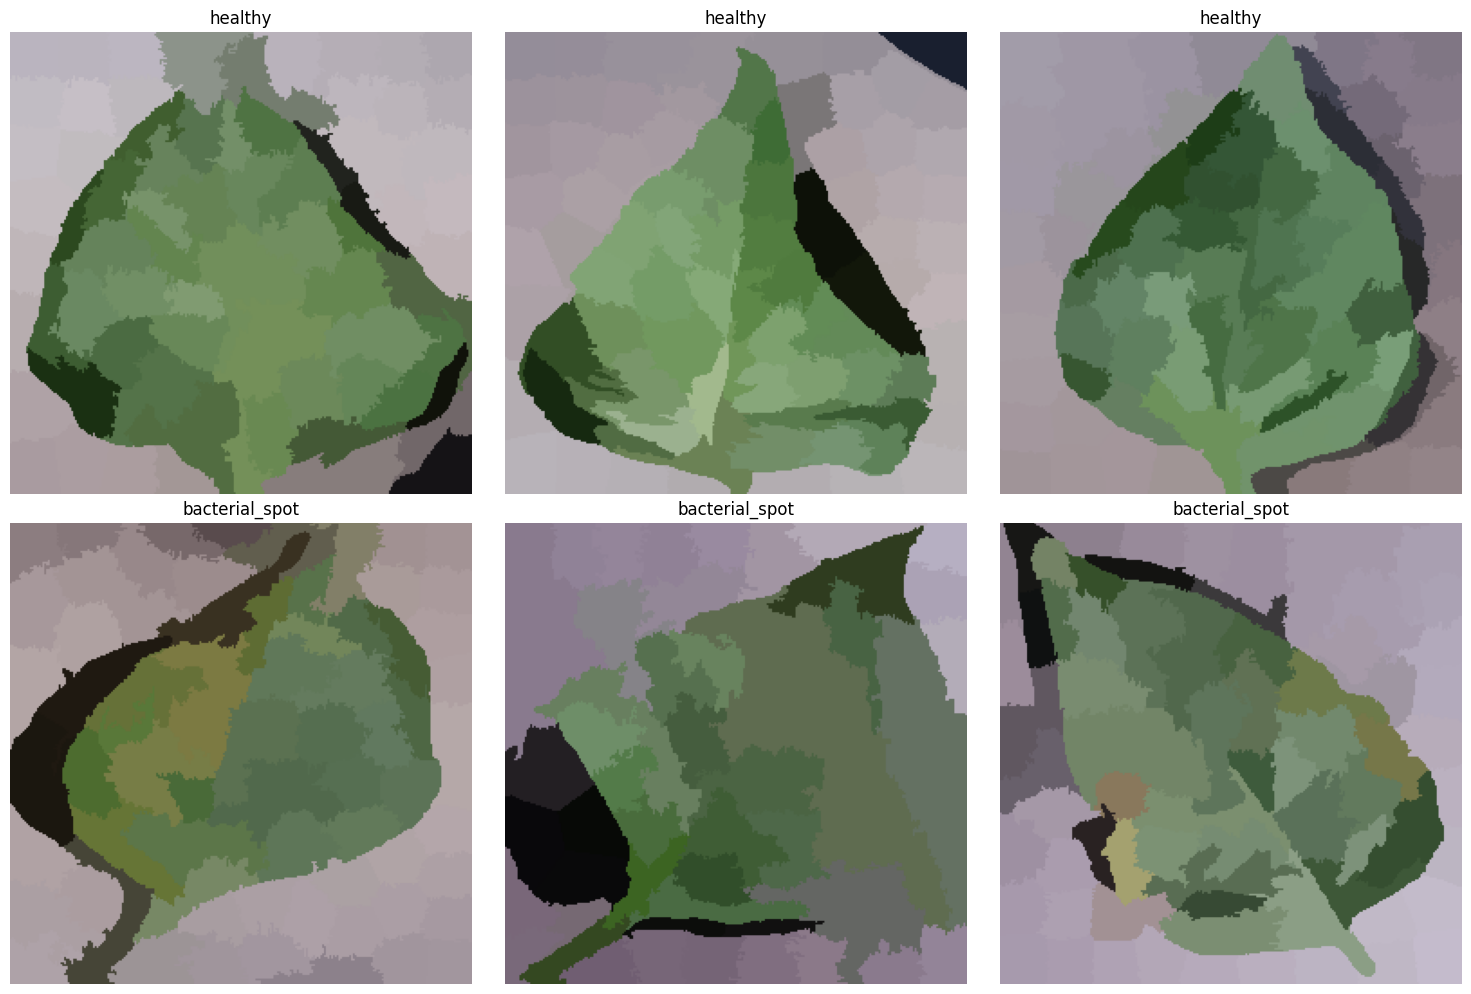

In [41]:
all_images = []
for label, urls in images_pepper_bell.items():
    for url in urls:
        img = io.imread(url)
        segments = segmentation.slic(img, n_segments=100)
        segmented_image = color.label2rgb(segments, img, kind='avg')
        all_images.append((segmented_image, label))

# Plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for ax, (segmentation_img, title) in zip(axes.flat, all_images):
    ax.imshow(segmentation_img, cmap='grey')  # Use a colormap to show superpixels
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()